<center>
    <h1><b>ICT MAIN PROJECT</b></h1>
    <h3><b>DSA Batch 2 - GROUP 5</b></h3>
    <pre>DOMAIN : ENTERTAINMENT
    PROJECT : MOVIE GENRE PREDICTION / RECOMMENDATION SYSTEM</pre>
    <h4><b>WEEK 1 - EDA </b></h4>
</center>

<h4><b>STEP 1 : Importing all necessary libraries in to notebook

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

<h2><b> TASK 1 : UNDERSTANDING DATA

<h4> Reading the dataset to the python environment

In [2]:
data = pd.read_csv('all_df.csv',low_memory=False)

<h4><b>A : Displaying first few rows

In [3]:
data.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
0,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,32,den sorte drøm
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,18,cleopatra
2,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,29,l'inferno
3,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,5.7,484,NaN,NaN,NaN,NaN,13.0,5.0,36,"from the manger to the cross; or, jesus of naz..."
4,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,6.8,753,NaN,NaN,NaN,NaN,12.0,9.0,22,madame dubarry


 <h4><b>B : Checking dataset shape

In [4]:
data.shape

(74889, 24)

<h5> There are 74,889 instances and 24 attributes for the dataset.

<H4><B> C : Checking column names

In [5]:
data.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'description_#words',
       'movie_title'],
      dtype='object')

<b><h4>D : Checking dataset info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74889 entries, 0 to 74888
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          74889 non-null  object 
 1   title                  74889 non-null  object 
 2   original_title         74889 non-null  object 
 3   year                   74889 non-null  object 
 4   date_published         74889 non-null  object 
 5   genre                  74889 non-null  object 
 6   duration               74889 non-null  int64  
 7   country                74830 non-null  object 
 8   language               74171 non-null  object 
 9   director               74823 non-null  object 
 10  writer                 73584 non-null  object 
 11  production_company     71145 non-null  object 
 12  actors                 74837 non-null  object 
 13  description            74889 non-null  object 
 14  avg_vote               74889 non-null  float64
 15  vo

<h4><b> E : Checking for descriptive statistics

In [7]:
#1
data.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,description_#words
count,74889.000000,74889.000000,7.488900e+04,11678.000000,68842.000000,65181.000000,74889.000000
mean,100.352522,5.900541,9.730489e+03,55.712023,46.574853,27.658566,29.717956
std,22.357984,1.229920,5.473764e+04,17.763344,180.482569,58.829668,7.226405
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,16.000000
25%,88.000000,5.200000,2.100000e+02,43.000000,4.000000,3.000000,24.000000
50%,96.000000,6.100000,5.000000e+02,56.000000,9.000000,8.000000,31.000000
75%,108.000000,6.800000,1.789000e+03,69.000000,27.000000,24.000000,35.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000,79.000000


In [8]:
#2
data.describe(include=object)

,imdb_title_id,title,original_title,year,date_published,genre,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income,movie_title
count,74889,74889,74889,74889,74889,74889,74830,74171,74823,73584,71145,74837,74889,20811,13558,26918,74889
unique,74889,71907,70906,111,20790,1213,4483,3994,31925,59381,29309,74806,74821,4217,13171,26446,70868
top,tt3349728,Anna,Wanted,2017,2010,Drama,USA,English,Michael Curtiz,Jing Wong,Metro-Goldwyn-Mayer (MGM),"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",Desperate measures are taken by a man who trie...,$ 1000000,$ 1000000,$ 8144,anna
freq,1,8,8,2968,104,10850,25235,31900,77,73,1146,4,4,668,17,15,8


<h4><b> F : Checking for null values

In [9]:
data.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     59
language                   718
director                    66
writer                    1305
production_company        3744
actors                      52
description                  0
avg_vote                     0
votes                        0
budget                   54078
usa_gross_income         61331
worlwide_gross_income    47971
metascore                63211
reviews_from_users        6047
reviews_from_critics      9708
description_#words           0
movie_title                  0
dtype: int64

<h2><b> TASK 2 : EXPLORATORY DATA ANALYSIS

In [10]:
#Importing warning packages to ignore future warnings
import warnings
warnings.filterwarnings('ignore')

<h3><b> A : UNIVARIATE ANALYSIS

<h4><b> &#8544; : Distribution of number of movies released over the years

In [11]:
data.year.value_counts()

2017             2968
2018             2913
2016             2785
2015             2655
2014             2627
                 ... 
1917               18
1913                8
1911                5
1912                3
TV Movie 2019       1
Name: year, Length: 111, dtype: int64

In [12]:
#Locating 'TV Movie 2019'
data.loc[data['year']=='TV Movie 2019']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
73144,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,...,7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0,33,bad education


In [13]:
#basic text cleaning
data['year'][73144]=data['year'][73144].replace('TV Movie ','')
#changing datatype 'string' to numerical value
data['year']=pd.to_numeric(data['year'])

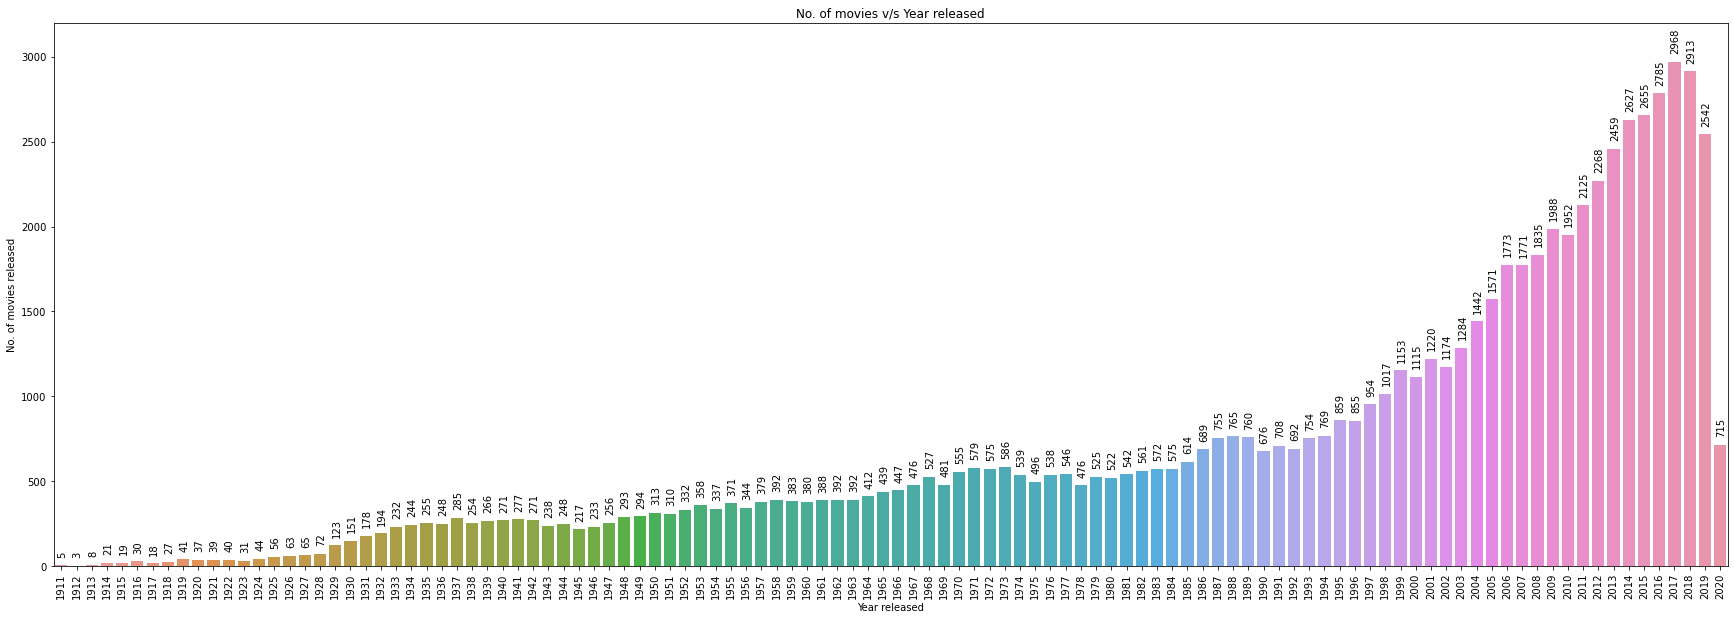

In [14]:
#plotting movie distribution by year
plt.figure(figsize=(30,10))
fig=sns.countplot(data['year'])
plt.title("No. of movies v/s Year released")
plt.xticks(rotation=90)
plt.xlabel("Year released")
plt.ylabel("No. of movies released")
plt.ylim(0,3200)
#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height()) , (p.get_x()+0.15, p.get_height()+60),rotation=90)

INSIGHTS : 
1. The number of movies released per year is increasing year by year.
2. There is a decline in the number of movies released in 2020, which might be due to the pandemic. 

<h4><b>&#8545; : Distribution of movies by genre

In [15]:
#1 - Genre/Genre combination(s) directly from dataset
data.genre.value_counts()

Drama                          10850
Comedy                          6365
Comedy, Drama                   3445
Drama, Romance                  3001
Comedy, Romance                 2202
                               ...  
Adventure, Thriller, Drama         1
Animation, Action, Thriller        1
Fantasy, Romance, Sci-Fi           1
Musical, Thriller                  1
Romance, War, Action               1
Name: genre, Length: 1213, dtype: int64

INSIGHTS : 
1. Huge number of movies are released in drama Genre
2. Total of 1213 unique combination of genre of movies present in dataset

In [16]:
#Cleaning Genre Column and finding distribution of unique genre

#Defining Cleaning function - Removes Spaces between strings
def clean_list(list):
    l=[]
    for i in list:
        l.append(i.replace(' ',''))
    return l

#Splitting and Relisting Genre Elements
genre1 = data['genre'].str.split(',')
li=[]
for i in genre1:
    li.append(clean_list(i))


#creating a list of all genres
genre_list=[]
for x in li:
    for y in x:
        if y not in genre_list:
            genre_list.append(y)
            
#genre_list=list(set(genre_list))
genre_list 

['Drama',
 'History',
 'Adventure',
 'Fantasy',
 'Biography',
 'Romance',
 'Crime',
 'War',
 'Mystery',
 'Horror',
 'Western',
 'Comedy',
 'Family',
 'Action',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Animation',
 'Musical',
 'Music',
 'Film-Noir',
 'Adult',
 'Reality-TV',
 'News',
 'Documentary']

In [17]:
#Counting Movies in respective genres
d_genre={}
for x in genre_list:
    d_genre[x]=0
for x in genre_list:
    for i in li:
        if x in i:
            d_genre[x]+=1
d_genre=dict(sorted(d_genre.items(), key=lambda item: item[1],reverse=True))

In [18]:
# function to add value labels
def addlabels(x):
    for key,value in x.items():
        plt.text(key,x[key]+500,x[key])

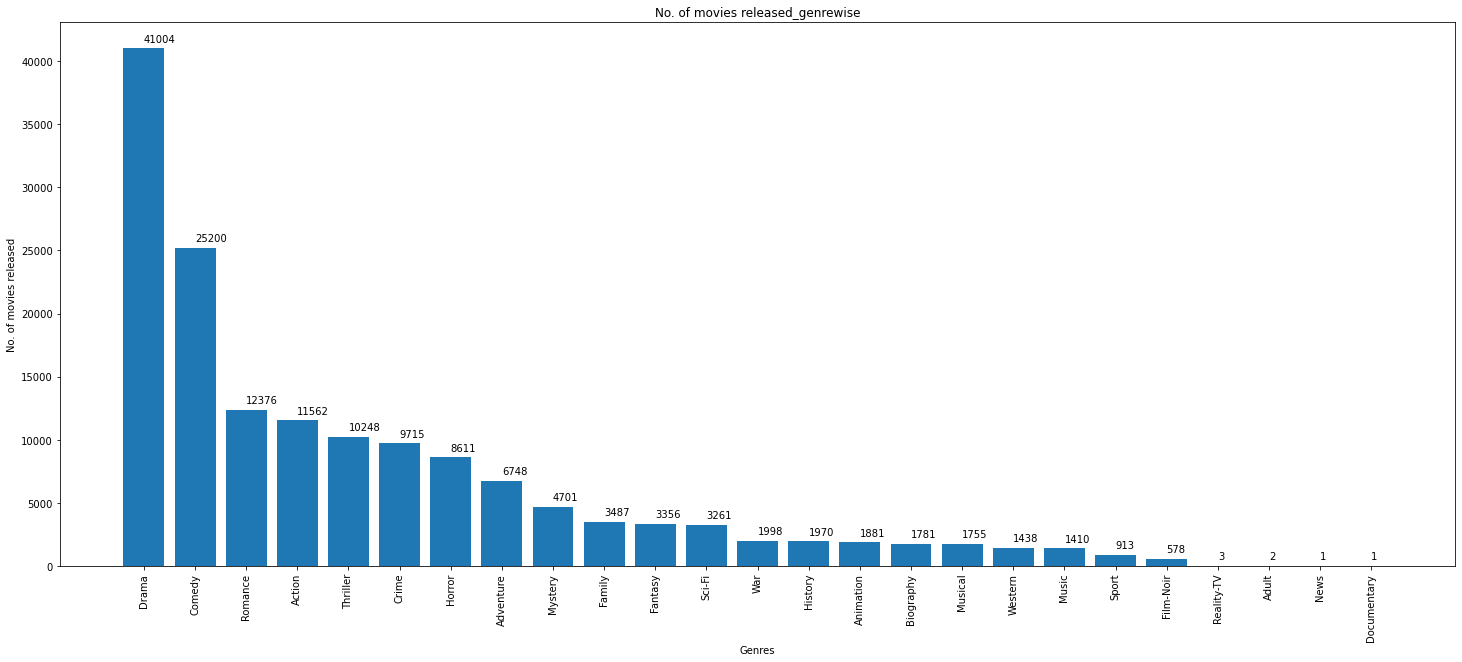

In [19]:
#Plotting Distribution of Movies by genre
plt.figure(figsize=(25,10))
plt.bar(d_genre.keys(),d_genre.values())
addlabels(d_genre)
plt.title("No. of movies released_genrewise")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("No. of movies released")
plt.show()

INSIGHT :
1. Drama genre has the highest number of movies, followed by 'Comedy' and 'Romance'.
2. There are very few movies in the 'News', 'Documentary', 'Adult' genres.

<h4><b> &#8546; : Top 10 Movies based on Number of Votes Received

In [20]:
#Checking Top 10 movies by votes in dataframe
data.nlargest(10,['votes'])

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
24993,tt0111161,Le ali della libertà,The Shawshank Redemption,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,...,9.3,2278845,$ 25000000,$ 28699976,$ 28815245,80.0,8232.0,164.0,19,the shawshank redemption
41727,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,...,9.0,2241615,$ 185000000,$ 535234033,$ 1005455211,84.0,6938.0,423.0,33,the dark knight
49793,tt1375666,Inception,Inception,2010,2010-09-24,"Action, Adventure, Sci-Fi",148,"USA, UK","English, Japanese, French",Christopher Nolan,...,8.8,2002816,$ 160000000,$ 292576195,$ 869784991,74.0,3927.0,473.0,27,inception
28549,tt0137523,Fight Club,Fight Club,1999,1999-10-29,Drama,139,"USA, Germany",English,David Fincher,...,8.8,1807440,$ 63000000,$ 37030102,$ 101218804,66.0,3758.0,370.0,20,fight club
24927,tt0110912,Pulp Fiction,Pulp Fiction,1994,1994-10-28,"Crime, Drama",154,USA,"English, Spanish, French",Quentin Tarantino,...,8.9,1780147,$ 8000000,$ 107928762,$ 222831817,94.0,3058.0,289.0,27,pulp fiction
24643,tt0109830,Forrest Gump,Forrest Gump,1994,1994-10-06,"Drama, Romance",142,USA,English,Robert Zemeckis,...,8.8,1755490,$ 55000000,$ 330455270,$ 678229452,82.0,2416.0,169.0,39,forrest gump
28324,tt0133093,Matrix,The Matrix,1999,1999-05-07,"Action, Sci-Fi",136,USA,English,"Lana Wachowski, Lilly Wachowski",...,8.7,1632315,$ 63000000,$ 171479930,$ 465718588,73.0,4310.0,342.0,23,the matrix
27519,tt0120737,Il Signore degli Anelli - La compagnia dell'An...,The Lord of the Rings: The Fellowship of the Ring,2001,2002-01-18,"Action, Adventure, Drama",178,"New Zealand, USA","English, Sindarin",Peter Jackson,...,8.8,1619920,$ 93000000,$ 315544750,$ 887934303,92.0,5392.0,340.0,28,the lord of the rings: the fellowship of the ring
29945,tt0167260,Il Signore degli Anelli - Il ritorno del re,The Lord of the Rings: The Return of the King,2003,2004-01-22,"Action, Adventure, Drama",201,"New Zealand, USA","English, Quenya, Old English, Sindarin",Peter Jackson,...,8.9,1604280,$ 94000000,$ 377845905,$ 1142271098,94.0,3718.0,353.0,28,the lord of the rings: the return of the king
13512,tt0068646,Il padrino,The Godfather,1972,1972-09-21,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,...,9.2,1572674,$ 6000000,$ 134966411,$ 246120974,100.0,3977.0,253.0,18,the godfather


In [21]:
#Creating List of Top10 Movies
TOP10_VOTES = data.votes.nlargest(10)
TOP10_IN = TOP10_VOTES.index

lis = []
for i in TOP10_IN:
    K = data.loc[data.index==i].original_title        #Saving original Title/movie name to a variable K
    K = K.to_string()                                 #Converting 'Series' data type to 'String'
    K = K[9:]                                         #Removing first 9 placeholders from K
    lis.append(K)
lis

['The Shawshank Redemption',
 'The Dark Knight',
 'Inception',
 'Fight Club',
 'Pulp Fiction',
 'Forrest Gump',
 'The Matrix',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Lord of the Rings: The Return of the King',
 'The Godfather']

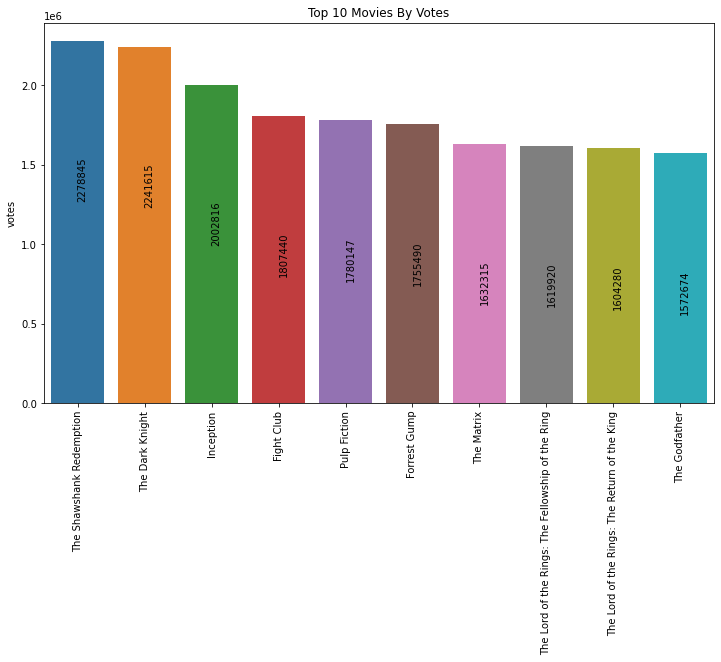

In [22]:
#Plotting Top 10 movies by votes
fig,axs = plt.subplots(figsize=(12,7))
BarP = sns.barplot(x=lis,y=TOP10_VOTES)
BarP.set_title("Top 10 Movies By Votes")
plt.xticks(rotation = 90)
for p in BarP.patches:
    BarP.annotate(round(p.get_height()) , (p.get_x()+0.4,p.get_height()-1e6),rotation=90)
plt.show()

INSIGHT : 
1. 'The Shawshank Redemption' received the most number of votes followed by 'The Dark Knight' and 'Inception'.

#### &#8547; : Top 10 movies based on profit

In [23]:
#remove $ sign and converting columns to numerical type
for x in ['budget', 'usa_gross_income', 'worlwide_gross_income']:
    data[x]=pd.to_numeric(data[x].str.replace(r'\D', ''))

In [24]:
#Calculating the profit of movies
data['profit']=data['worlwide_gross_income']-data['budget']
data['profit'] =data['profit'] .apply(lambda x: x if x > 0 else 0)

In [25]:
TOP10_Profit = data.profit.nlargest(10)
TOP10_IND = TOP10_Profit.index

lis1 = []
for i in TOP10_IND:
    K = data.loc[data.index==i].original_title        #Saving original Title/movie name to a variable K
    K = K.to_string()                                 #Converting 'Series' data type to 'String'
    K = K[9:]                                         #Removing first 9 placeholders from K
    lis1.append(K)
lis1

['Avatar',
 'Titanic',
 'Star Wars: Episode VII - The Force Awakens',
 'Avengers: Infinity War',
 'Jurassic World',
 'The Lion King',
 'Frozen II',
 'The Avengers',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Jurassic World: Fallen Kingdom']

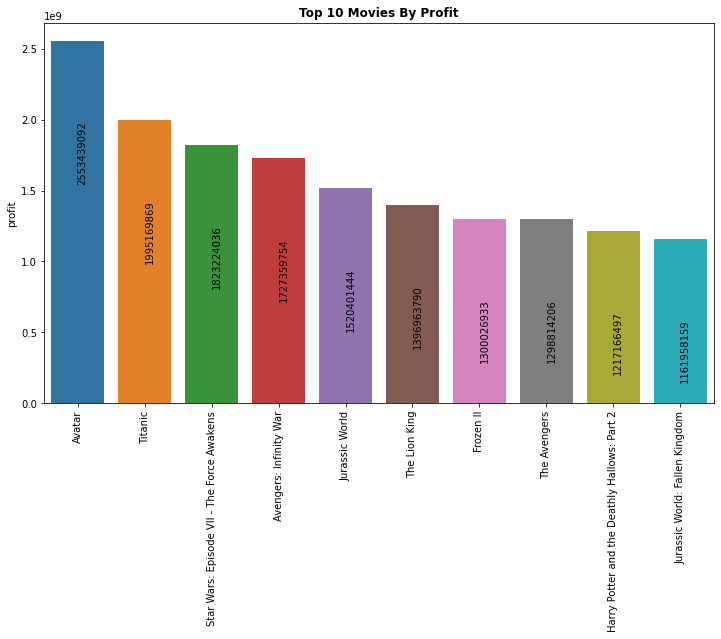

In [26]:
#Plotting Top 10 movies by votes
fig,axs = plt.subplots(figsize=(12,7))
BarP = sns.barplot(x=lis1,y=TOP10_Profit)
BarP.set_title("Top 10 Movies By Profit",weight = 'bold')
plt.xticks(rotation = 90)
for p in BarP.patches:
    BarP.annotate(round(p.get_height()) , (p.get_x()+0.4,p.get_height()-1e9),rotation=90)
plt.show()

INSIGHT :
1. All the top ten movies have made profit over a billion dollars.
2. None of the top ten movies have made it to the top ten profitable movie  list. 

#### &#8548; : Top 10 directors by number of movie directed

In [27]:
data.director.value_counts().nlargest(10)

Michael Curtiz        77
Jesús Franco          76
Lesley Selander       70
Lloyd Bacon           67
Richard Thorpe        62
William Beaudine      59
John Ford             57
Giannis Dalianidis    56
Raoul Walsh           54
Cheh Chang            53
Name: director, dtype: int64

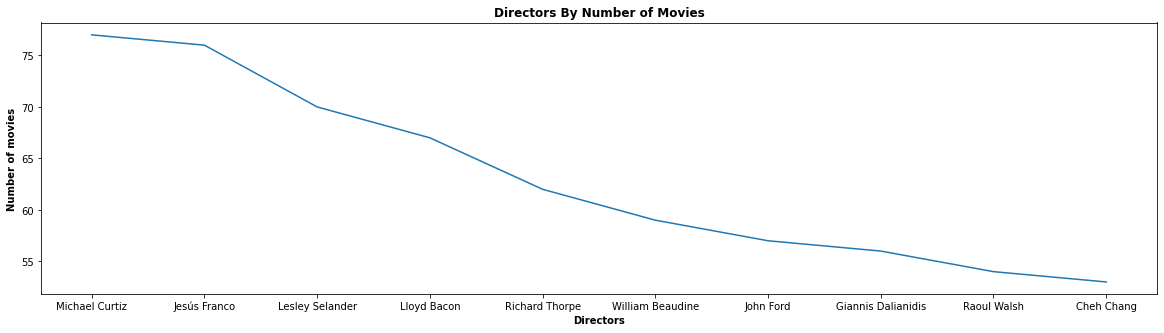

In [28]:
fig,axs=plt.subplots(figsize=(20,5))
LineP=sns.lineplot(x=data['director'].value_counts()[:10].index,y=data['director'].value_counts()[:10])
LineP.set_title("Directors By Number of Movies", weight = "bold")
LineP.set_xlabel("Directors", weight = "bold")
LineP.set_ylabel("Number of movies", weight = "bold")
plt.show()

INSIGHT :    
1. Michael Curtiz directed 77 movies while J.Franco is in 2nd position only behind by 1 movie.


#### &#8549; : Boxplot of some numerical datatypes

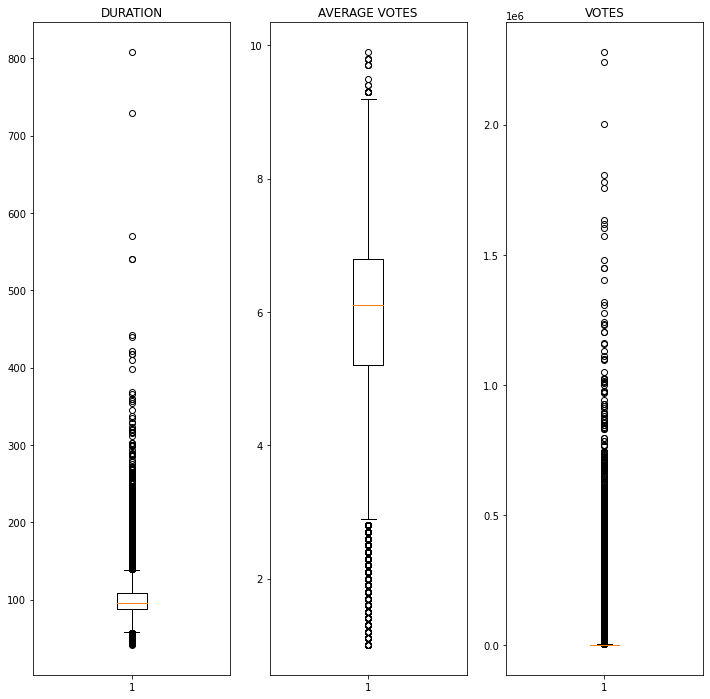

In [29]:
plt.figure(figsize = (12,12))

plt.subplot(1,3,1)
plt.boxplot(data['duration'])
plt.gca().set_title('DURATION')

plt.subplot(1,3,2)
plt.boxplot(data['avg_vote'])
plt.gca().set_title('AVERAGE VOTES')

plt.subplot(1,3,3)
plt.boxplot(data['votes'])
plt.gca().set_title('VOTES')

plt.show()

INSIGHT : 
1. There are outliers in all the three attributes.
2. The attributes 'duration' and 'votes' are less distributed.

<h4><b> &#8550; : Top 10 countries based on number of movies released

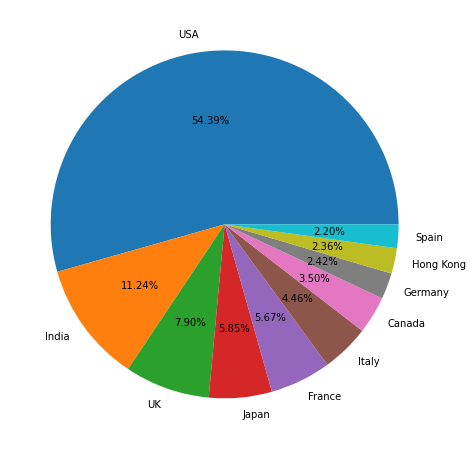

In [30]:
Coun_T10 = data.country.value_counts().nlargest(10)
plt.figure(figsize = (8,8))
plt.pie(Coun_T10,labels=Coun_T10.index,autopct= '%1.2f%%')
plt.show()

INSIGHT : 
1. USA releases the most number of movies followed by India and UK.
2. USA produces more movies than the other nine countries in the list combined.

<h4><b> &#8551; : Top 10 languages based on number of movies released

In [31]:
Country_T10 = data.language.value_counts().nlargest(10)

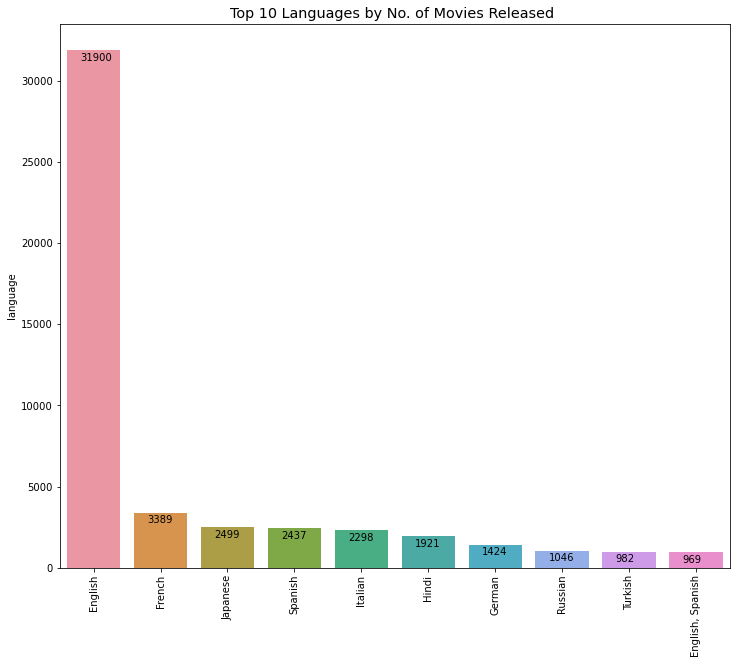

In [32]:
fig,axs=plt.subplots(figsize=(12,10))
plt.style.use('ggplot')
g=sns.barplot(x = Country_T10.index, y = Country_T10)
g.set_title("Top 10 Languages by No. of Movies Released ")
plt.xticks(rotation = 90)
for p in g.patches:
    g.annotate(round(p.get_height()) , (p.get_x()+0.2,p.get_height()-650))
plt.show()

INSIGHT :
1. The highest number of movies are produced in the English language followed by French and Japanese languages.
2. Also, movies released in English are almost ten times the number of movies released in French.

<H3><B> B : BIVARIATE ANALYSIS

<h4><b>&#8544; : Worldwide gross income v/s Metascore

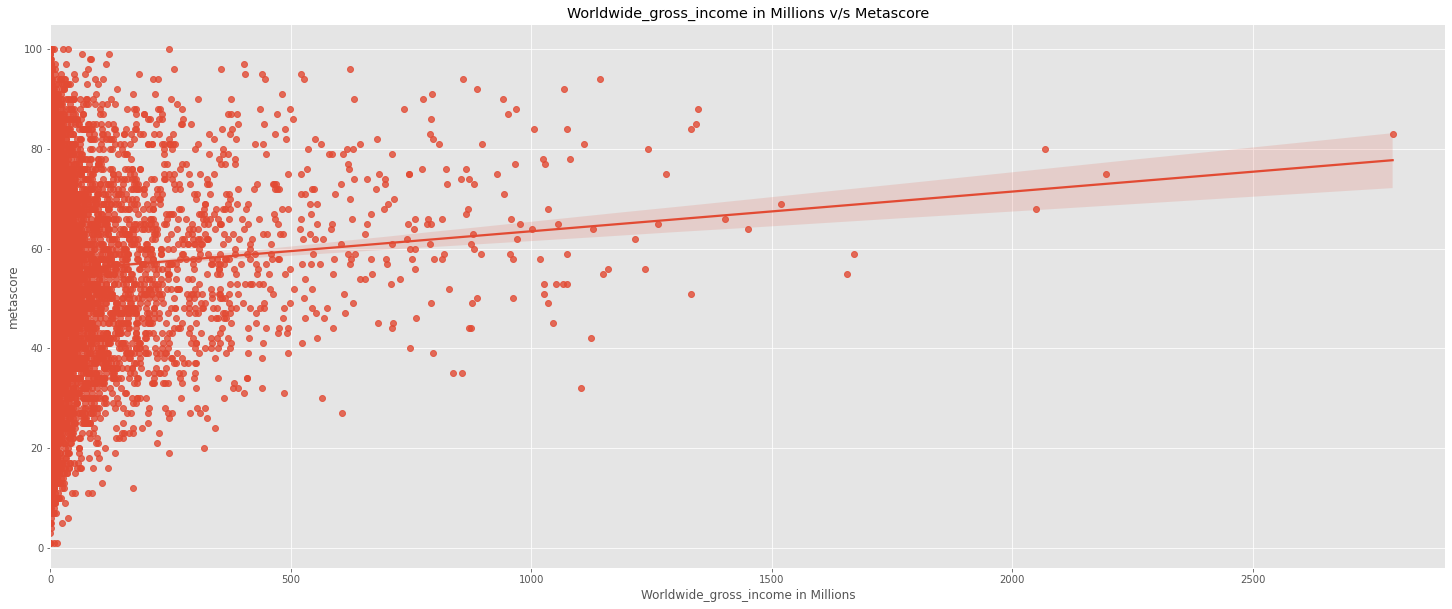

In [33]:
plt.figure(figsize=(25,10))
sns.regplot((data['worlwide_gross_income']/1000000),data['metascore'])
plt.title("Worldwide_gross_income in Millions v/s Metascore")
plt.xlabel("Worldwide_gross_income in Millions")
plt.xlim(0,2900)
plt.show()

INSIGHTS : 
1. There is a slight positive correlation between worldwide gross income and metascore of a movie.
2. However, some movies which have been highly rated by critics perform very badly in the box office.

#### &#8545; : Average budget spend on movies - genrewise

In [34]:
#creating a subset of data without missing values of 'budget'
data_budget=data.dropna(subset=['budget'])
data_budget=data_budget.reset_index()

In [35]:
#creating a dictionary with keys as genres and values as budget spend
d_budget={}

for x in genre_list:
    d_budget[x]=0
for x in genre_list:
    i=0
    for k in data_budget['genre']:
        if x in k:
            d_budget[x]+=data_budget['budget'][i]
        i+=1

#calculating average budget in millions
for key in d_budget:
    d_budget[key]=(d_budget[key]/d_genre[key]/1000000)
    
d_budget=dict(sorted(d_budget.items(), key=lambda item: item[1],reverse=True))

# function to add value labels
def addlabels1(x):
    for key,value in x.items():
        plt.text(key,x[key]+1,round(x[key],3))

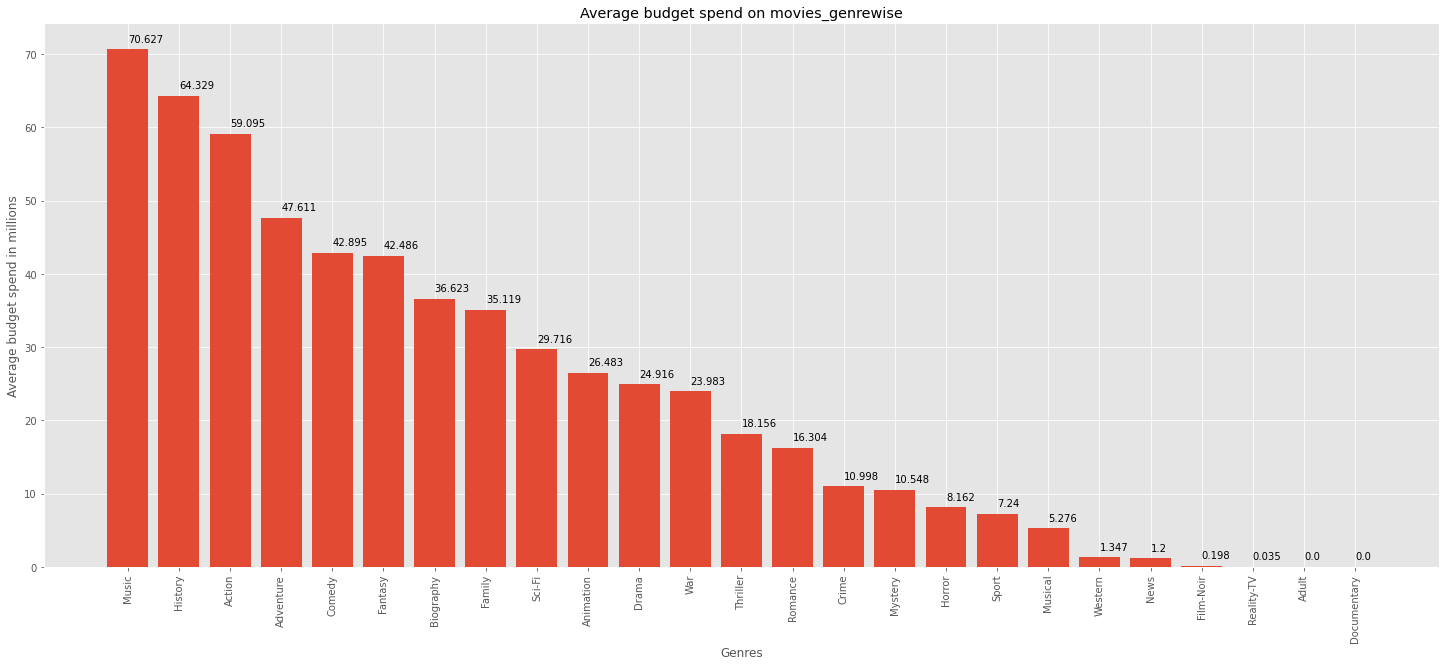

In [36]:
plt.figure(figsize=(25,10))
plt.bar(d_budget.keys(),d_budget.values())
addlabels1(d_budget)
plt.title("Average budget spend on movies_genrewise")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Average budget spend in millions")
plt.show()

INSIGHT :
1. The highest budget is spend on 'History', 'Music' and 'Action' genres.

#### &#8546; : Average profit of movies_genrewise

In [37]:
#creating a subset of data without missing values of 'profit'
data_profit=data.dropna(subset=['worlwide_gross_income','budget'])
data_profit=data_profit.reset_index()

#creating a dictionary with keys as genres and values as average profit
d_profit={}

for x in genre_list:
    d_profit[x]=0
for x in genre_list:
    i=0
    for k in data_profit['genre']:
        if x in k:
            d_profit[x]+=data_profit['profit'][i]
        i+=1

#calculating average profit in millions
for key in d_profit:
    d_profit[key]=(d_profit[key]/d_genre[key]/1000000)
    
d_profit=dict(sorted(d_profit.items(), key=lambda item: item[1],reverse=True))

# function to add value labels
def addlabels2(x):
    for key,value in x.items():
        plt.text(key,x[key]+0.5,round(x[key],3))

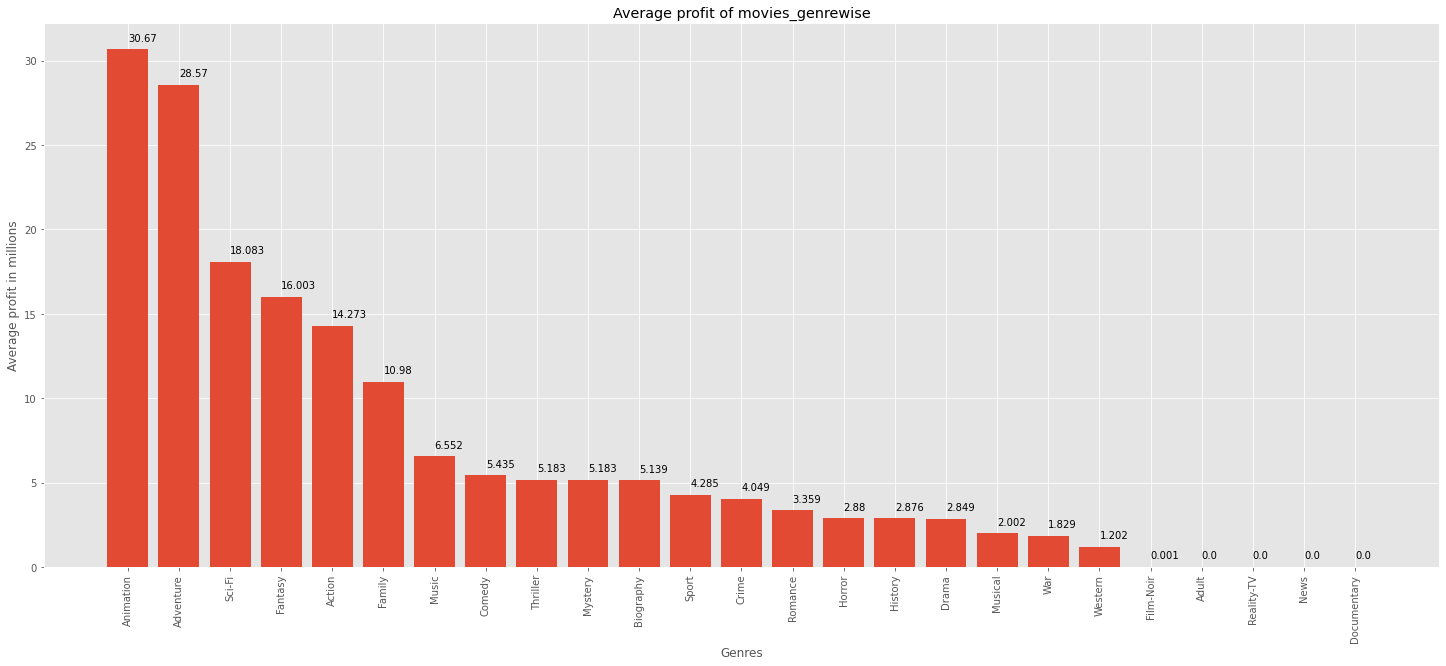

In [38]:
plt.figure(figsize=(25,10))
plt.bar(d_profit.keys(),d_profit.values())
addlabels2(d_profit)
plt.title("Average profit of movies_genrewise")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Average profit in millions")
plt.show()

INSIGHT:
1. 'Animation' and 'Adventure' brings the highest profit.<br>2. Despite the high budget spend on 'History', 'Music' and 'Action' movies, they are relatively less profitable.

#### &#8547; : Top profit making movies for the last decade

In [39]:
d_year=data_profit.groupby('year')
d_a=dict()

#creating a dictionary with keys as year and values as movie with the highest profit
for x in range(2011,2021):
    d_a[x]=''
for x in range(2011,2021):
    d_a[x]=data_profit['title'][d_year.get_group(x)['profit'].idxmax()]

#creating a dictionary with keys as year and values as profit
d_b={}
for x in range(2011,2021):
    d_b[x]=0
for x in range(2011,2021):
    d_b[x]=(data_profit.loc[data_profit['title']==d_a[x],'profit'].values[0])/1000000

# function to add value labels
def addlabels3(x):
    for key,value in x.items():
        plt.text(d_a[key],d_b[key]+40,round(d_b[key],3))

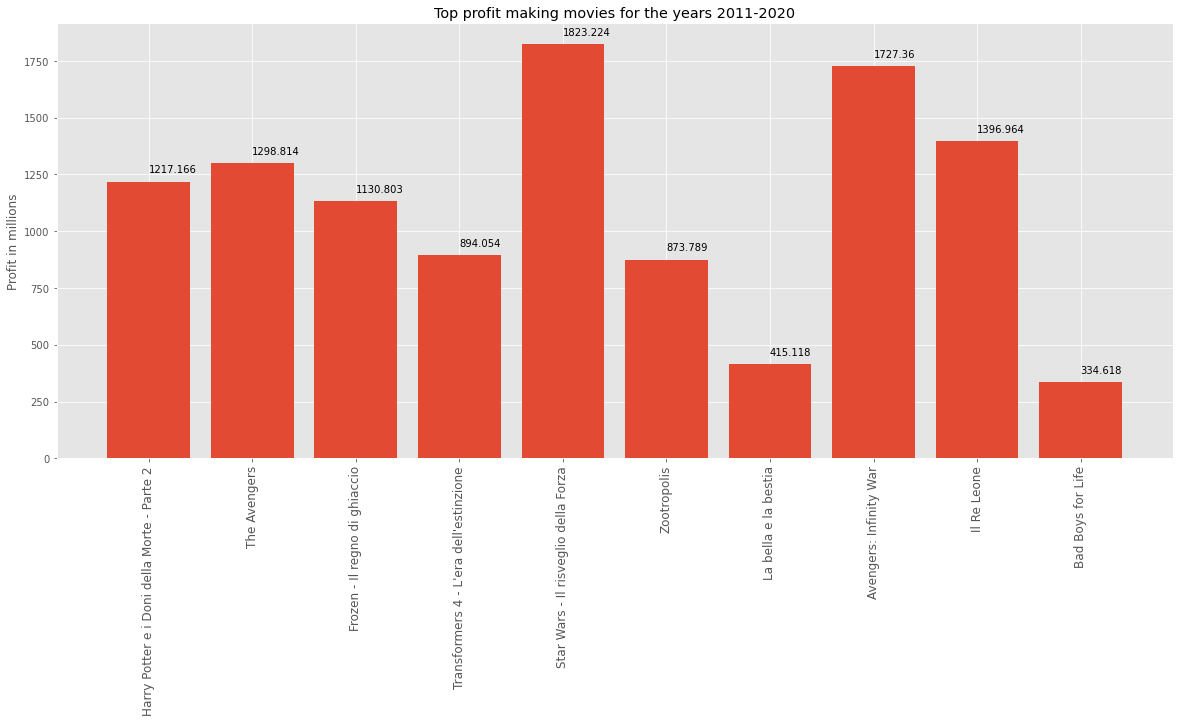

In [40]:
plt.figure(figsize=(20,8))
plt.style.use('ggplot')
plt.bar(d_a.values(),d_b.values())
addlabels3(d_a)
plt.title("Top profit making movies for the years 2011-2020")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Profit in millions")
plt.show()

Insights : 
1. All the top movies of the last decade have made a profit over 300 million dollars. 
2. 'The Avengers', the top profitable movie of 2012 has made it to the top ten profitable movie list of all times too. 

#### &#8548; : Top rated movies for the last decade

In [41]:
d_year1=data.groupby('year')
d_c=dict()

#creating a dictionary with keys as year and values as highest rated movie
for x in range(2011,2021):
    d_c[x]=''
for x in range(2011,2021):
    d_c[x]=data['original_title'][d_year1.get_group(x)['votes'].idxmax()]

#creating a dictionary with keys as year and values as votes
d_d={}
for x in range(2011,2021):
    d_d[x]=0
for x in range(2011,2021):
    d_d[x]=(data.loc[data['original_title']==d_c[x],'votes'].values[0])
    
# function to add value labels
def addlabels4(x):
    for key,value in x.items():
        plt.text(d_c[key],d_d[key]+10000,d_d[key])

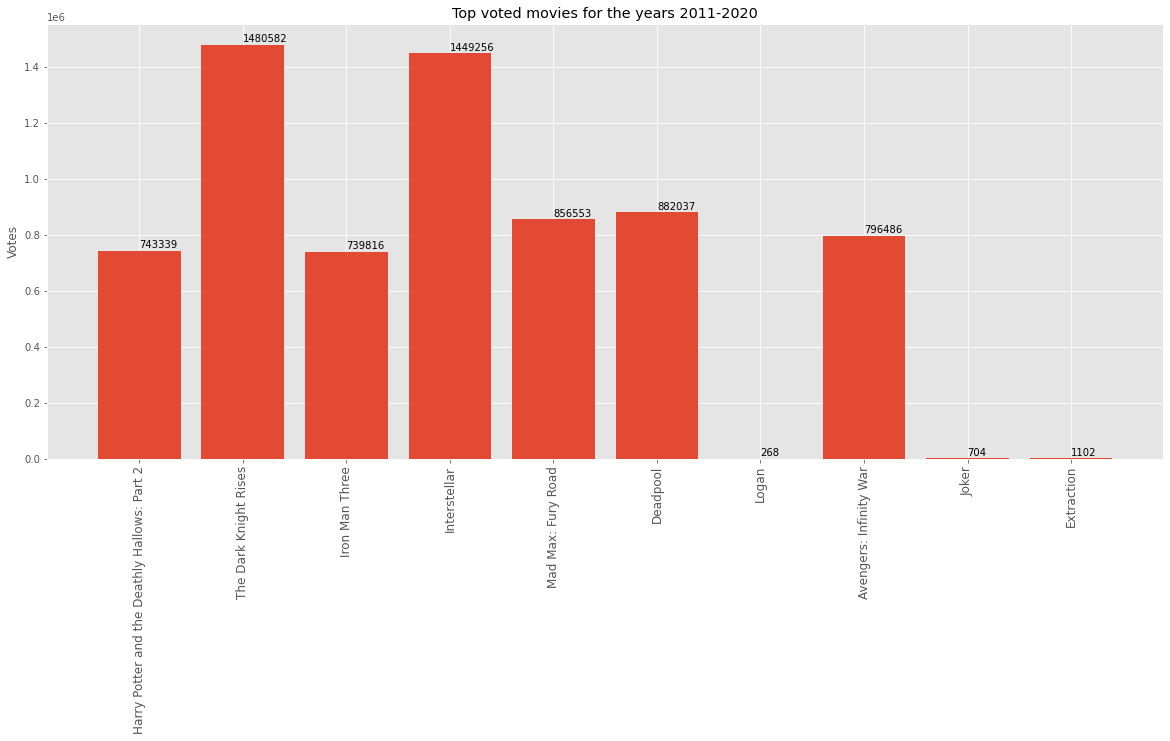

In [42]:
plt.figure(figsize=(20,8))
plt.style.use('ggplot')
plt.bar(d_c.values(),d_d.values())
addlabels4(d_c)
plt.title("Top voted movies for the years 2011-2020")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Votes")
plt.show()

INSIGHTS:
1. None of the top voted movies of the last decade has made it to the top voted movies of all times. 

#### &#8549; : Heatmap of dataset with respect to correlation 

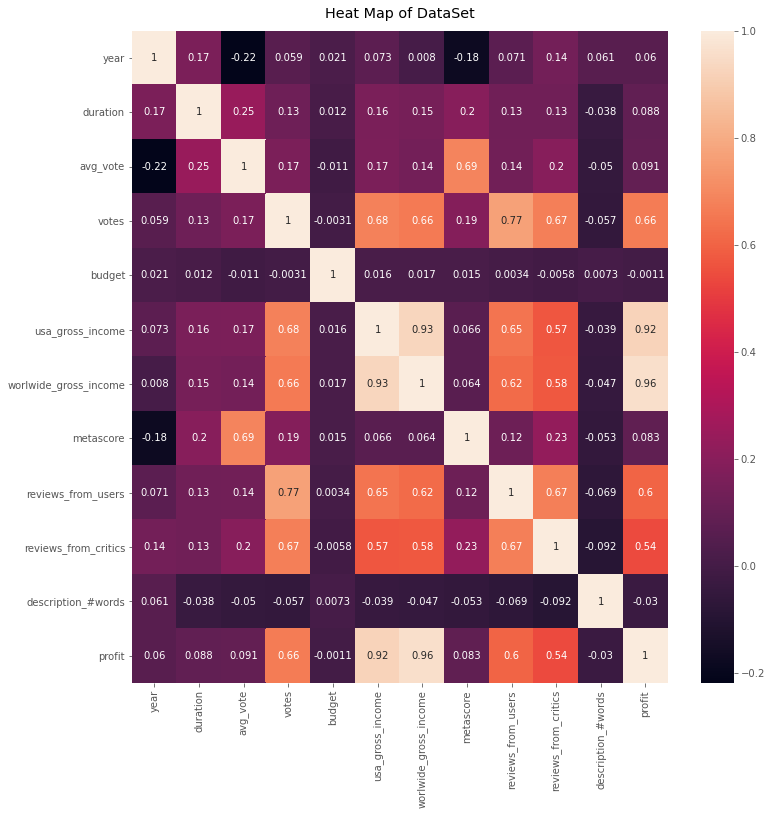

In [43]:
plt.figure(figsize = (12,12))
HM=sns.heatmap(data.corr(),annot=True)
HM.set_title("Heat Map of DataSet",y = 1.01)
plt.show()

<pre>INSIGHTS : 
A. Attributes having high positive correlation
    1. 'worlwide_gross_income' and 'profit'
    2. 'usa_gross_income' and 'profit'
    3. 'usa_gross_income' and 'worlwide_gross_income'

# <h2><b> TASK 3 : DATA PREPROCESSING

# <h3><b> A : DELETING DUPLICATE ROWS

In [44]:
#dropping duplicate rows
data.drop_duplicates
data.shape

(74889, 25)

There are no duplicate rows.

# <h3><b> B : HANDLING MISSING VALUES

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74889 entries, 0 to 74888
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          74889 non-null  object 
 1   title                  74889 non-null  object 
 2   original_title         74889 non-null  object 
 3   year                   74889 non-null  int64  
 4   date_published         74889 non-null  object 
 5   genre                  74889 non-null  object 
 6   duration               74889 non-null  int64  
 7   country                74830 non-null  object 
 8   language               74171 non-null  object 
 9   director               74823 non-null  object 
 10  writer                 73584 non-null  object 
 11  production_company     71145 non-null  object 
 12  actors                 74837 non-null  object 
 13  description            74889 non-null  object 
 14  avg_vote               74889 non-null  float64
 15  vo

In [46]:
#filling the missing values with an empty string
for x in ['country','language','director','writer','actors']:
    data[x]=data[x].fillna('')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74889 entries, 0 to 74888
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          74889 non-null  object 
 1   title                  74889 non-null  object 
 2   original_title         74889 non-null  object 
 3   year                   74889 non-null  int64  
 4   date_published         74889 non-null  object 
 5   genre                  74889 non-null  object 
 6   duration               74889 non-null  int64  
 7   country                74889 non-null  object 
 8   language               74889 non-null  object 
 9   director               74889 non-null  object 
 10  writer                 74889 non-null  object 
 11  production_company     71145 non-null  object 
 12  actors                 74889 non-null  object 
 13  description            74889 non-null  object 
 14  avg_vote               74889 non-null  float64
 15  vo

# <h3><b> C : CLEANING THE FEATURE 'GENRE'

In [48]:
data['genre'].head()

0                        Drama
1               Drama, History
2    Adventure, Drama, Fantasy
3             Biography, Drama
4    Biography, Drama, Romance
Name: genre, dtype: object

In [49]:
#Creating a list in the 'genre' feature
data['genre'] = data['genre'].str.split(',')
li=[]
for i in data['genre']:
    li.append(clean_list(i))
data['genre']=li
data['genre'].head()

0                        [Drama]
1               [Drama, History]
2    [Adventure, Drama, Fantasy]
3             [Biography, Drama]
4    [Biography, Drama, Romance]
Name: genre, dtype: object

# <h3><b> D : REMOVAL OF STOPWORDS

Stopwords are words that you do not want to use to describe the topic of your content.They have to be removed for better performance of the model.

In [50]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
list(stop_words)

['over',
 'haven',
 'where',
 "should've",
 'itself',
 "aren't",
 'wasn',
 'have',
 'too',
 'both',
 'are',
 're',
 'wouldn',
 'don',
 'then',
 'am',
 'up',
 "hadn't",
 "you'll",
 't',
 'you',
 'did',
 'doesn',
 'his',
 've',
 'than',
 'him',
 'these',
 'through',
 'any',
 'an',
 'about',
 'further',
 'having',
 'yours',
 'mightn',
 'been',
 'she',
 'most',
 "doesn't",
 'shouldn',
 'above',
 'me',
 'hers',
 'as',
 'down',
 'himself',
 'during',
 'very',
 'once',
 'aren',
 "hasn't",
 'who',
 'being',
 'he',
 'what',
 'the',
 'below',
 'no',
 "don't",
 'weren',
 'their',
 'own',
 'can',
 "needn't",
 "weren't",
 'ourselves',
 'i',
 'only',
 'ain',
 "didn't",
 'how',
 'few',
 "shan't",
 'herself',
 'yourselves',
 'ma',
 'does',
 'its',
 'ours',
 'needn',
 'same',
 'again',
 'here',
 'each',
 "haven't",
 'under',
 'at',
 'hasn',
 'yourself',
 'before',
 "that'll",
 'all',
 'o',
 'be',
 "couldn't",
 'has',
 'your',
 'my',
 "mustn't",
 'and',
 'after',
 'our',
 "mightn't",
 'if',
 'had',
 'we

In [51]:
# function for removing stopwords
def remove_stopwords(text):
    no_stopword_text = [x for x in text.split() if not x in stop_words]
    return ' '.join(no_stopword_text)

# functions for cleaning text
def clean_text(text):
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    return text

data['description_cleaned'] = data['description'].apply(lambda x: clean_text(x))
data['description_cleaned'] =data['description_cleaned'] .apply(lambda x: remove_stopwords(x))

# <h3><b> E : LEMMATIZATION

Lemmatization can be done to reduce the word to its root synonym.

In [52]:
from nltk.stem import WordNetLemmatizer 

#initialising the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
#to break text into terms wenever it encounters a whitespace
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    word_list=[lemmatizer.lemmatize(x) for x in w_tokenizer.tokenize(text)]
    return ' '.join(word_list)

data['description_cleaned'] =data['description_cleaned'].apply(lemmatize_text)
data[['description','description_cleaned']].head()

,description,description_cleaned
0,Two men of high rank are both wooing the beaut...,two men high rank wooing beautiful famous eque...
1,The fabled queen of Egypt's affair with Roman ...,fabled queen egypt affair roman general marc a...
2,Loosely adapted from Dante's Divine Comedy and...,loosely adapted dante divine comedy inspired i...
3,"An account of the life of Jesus Christ, based ...",account life jesus christ based book new testa...
4,"The story of Madame DuBarry, the mistress of L...",story madame dubarry mistress louis xv france ...


# <h3><b> F : FEATURE ENGINEERING

A new feature is created which contains all the key characteristics of a movie.

In [53]:
#defining functions for basic text cleaning

def clean_list1(text):
    s=''
    for x in text:
        s=s+' '+x
        s=s.lower()
    return s 

def clean_text1(text):
    text=text.replace(' ','')
    text=text.replace('.','')
    text=text.replace(',',' ')
    text=text.lower()
    return text

In [54]:
#performing some basic text cleaning
data['country_cleaned']=data['country'].apply(lambda x: clean_text(x))
data['language_cleaned']=data['language'].apply(lambda x: clean_text(x))
data['director_cleaned']=data['director'].apply(lambda x: clean_text1(x))
data['writer_cleaned']=data['writer'].apply(lambda x: clean_text1(x))
data['actors_cleaned']=data['actors'].apply(lambda x: clean_text1(x))
data['genre_cleaned']=data['genre'].apply(lambda x: clean_list1(x))

In [55]:
data[['country','country_cleaned','language','language_cleaned','director','director_cleaned','writer','writer_cleaned','actors','actors_cleaned','genre','genre_cleaned']].head(2)

,country,country_cleaned,language,language_cleaned,director,director_cleaned,writer,writer_cleaned,actors,actors_cleaned,genre,genre_cleaned
0,"Germany, Denmark",germany denmark,,,Urban Gad,urbangad,"Urban Gad, Gebhard Schätzler-Perasini",urbangad gebhardschätzler-perasini,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",astanielsen valdemarpsilander gunnarhelsengree...,[Drama],drama
1,USA,usa,English,english,Charles L. Gaskill,charleslgaskill,Victorien Sardou,victoriensardou,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",helengardner pearlsindelar missfielding missro...,"[Drama, History]",drama history


In [56]:
data['key_words']=data['genre_cleaned']+' '+data['country_cleaned']+' '+data['language_cleaned']+' '+data['director_cleaned']+' '+data['writer_cleaned']+' '+data['actors_cleaned']+' '+data['description_cleaned']
data[['original_title','key_words']].head()

,original_title,key_words
0,Den sorte drøm,drama germany denmark urbangad urbangad gebh...
1,Cleopatra,drama history usa english charleslgaskill vic...
2,L'Inferno,adventure drama fantasy italy italian frances...
3,"From the Manger to the Cross; or, Jesus of Naz...",biography drama usa english sidneyolcott gene...
4,Madame DuBarry,biography drama romance germany german ernstl...


# <h3><b> G : FEATURE REDUCTION

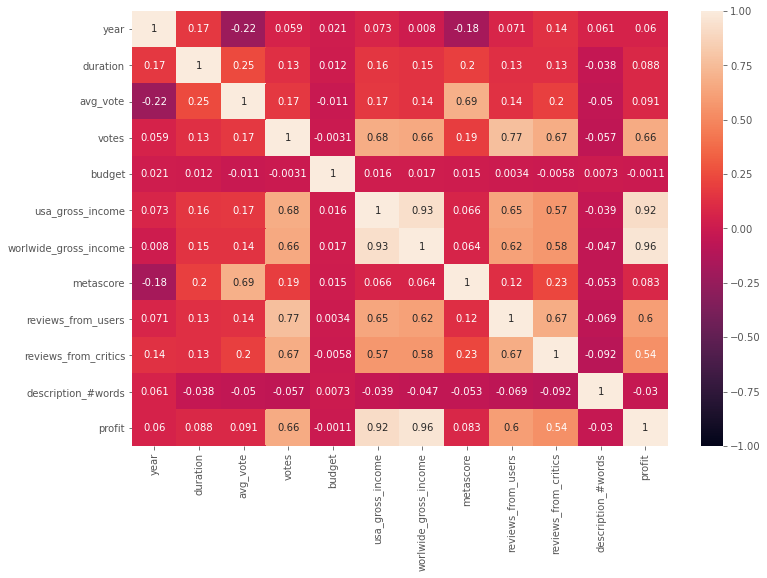

In [57]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

The following features have high positive correlation.<br>Average votes and metascore<br>Votes, USA gross income, worldwide gross income, reviews from users, reviews from critics and profit.

In [58]:
data=data.drop(['avg_vote','votes','usa_gross_income','reviews_from_users', 'reviews_from_critics','profit'],axis=1)

# <h3><b> H : HANDLING OUTLIERS

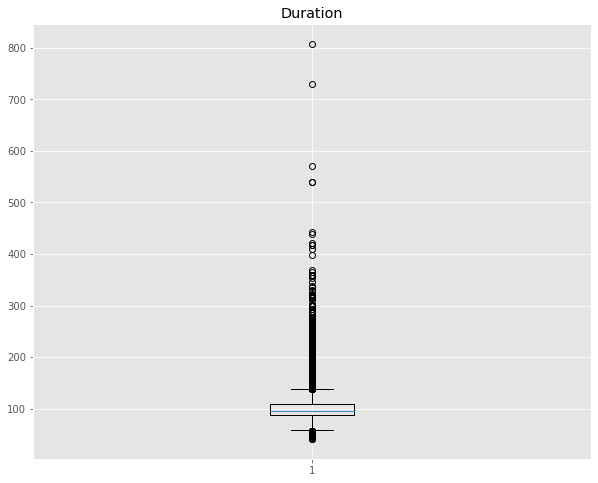

In [59]:
plt.figure(figsize = (10,8))
plt.boxplot(data['duration'])
plt.gca().set_title('Duration')
plt.show()

In [60]:
Q1  = np.percentile(data['duration'],25,interpolation='midpoint')
Q3  = np.percentile(data['duration'],75,interpolation='midpoint')
IQR = Q3-Q1
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
ind = data.loc[(data['duration']>UL) | (data['duration']<LL)].index
data1=data.drop(ind)

# <h3><b> I : STANDARDISATION

In [61]:
data['duration'].describe()

count    74889.000000
mean       100.352522
std         22.357984
min         41.000000
25%         88.000000
50%         96.000000
75%        108.000000
max        808.000000
Name: duration, dtype: float64

In [62]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
data['duration']=standardisation.fit_transform(data['duration'].to_numpy().reshape(-1,1))

In [63]:
data['duration'].describe()

count    7.488900e+04
mean     6.074713e-15
std      1.000007e+00
min     -2.654663e+00
25%     -5.524919e-01
50%     -1.946755e-01
75%      3.420491e-01
max      3.165098e+01
Name: duration, dtype: float64